In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = genfromtxt('S21_M4DS_PRJ_03_LinReg_data_X.csv', delimiter=',')
Y= genfromtxt('S21_M4DS_PRJ_03_LinReg_data_Y.csv', delimiter=',')
X =  X[:, ~np.isnan(X).any(axis=0)]
r,c = np.shape(X)
a0=np.ones([r,1])
X= np.append(a0, X, axis=1)
print(np.shape(X))
print(np.shape(Y))

NameError: name 'genfromtxt' is not defined

In [ ]:
a = np.linalg.pinv(X).dot(Y)
print(a)

In [14]:
a_AS2 = np.linalg.pinv(X).dot(Y)
print(a_AS2)

[[ 3.35558853e+00  2.67382332e+00  2.62917658e+01]
 [ 6.36158872e-01  4.09317772e-01  2.83741604e+00]
 [-3.84624028e-01 -7.05700446e-01 -6.58671390e+00]
 [-9.91797148e-02 -4.90844832e-03 -6.01655894e+00]
 [ 3.43819245e-01  1.23928209e-01  2.31261702e+00]
 [ 3.73624414e-01  1.15816560e+00 -3.20689702e+00]]


In [15]:
num = int(len(X)*0.8)

#Training data:
train_X = X[:num]
train_Y = Y[:num]
#Testing data:
test_X = X[num:]
test_Y = Y[num:]
a_AS1 = np.linalg.pinv(train_X).dot(train_Y)
a_AS2 = np.linalg.pinv(test_X).dot(test_Y)

In [5]:
def cost_function(a,X,y,la):
    m = len(y)
    h = np.dot(X,a)
    cost = 1/(2*m)* np.sum(np.square(h-y))+(la*np.sum(a*a))
    #cost = 1/(2*m)* np.sum(np.sum(np.square(h-y)))
    return cost

In [6]:
def gradient_descent(a,X,y,la,learning_rate=0.1,iteration=1000):
    a_history = []
    J_history = []
    for i in range(iteration):
        h = np.dot(X,a)
        m= len(y)
        a = a -(1/m)* (learning_rate* np.dot(X.T,(h-y))*(la*a))
        #a = a -(1/m)* (learning_rate* np.dot(X.T,(h-y)))
        a_history =+ a
        J_history.append(cost_function(a,X,y,la))
    return J_history[-1]

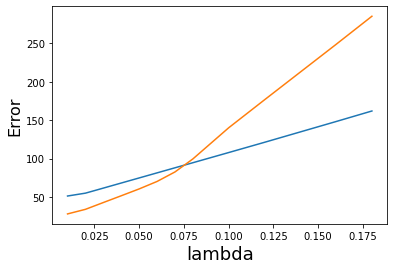

In [16]:
la= [0.01,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.16,0.18]
A=[]
B=[]
r,c = np.shape(train_X)
a=np.ones([c,1])
a=a*0.1
r,c = np.shape(test_X)
b=np.ones([c,1])
b=b*0.1
for i in range(len(la)):
    A.append(gradient_descent(a,train_X,train_Y,la[i]))
    B.append(gradient_descent(b,test_X,test_Y,la[i]))
    n= len(train_X)
    m= len(test_X)
plt.plot(la,A)
plt.plot(la,B)
plt.xlabel('lambda', fontsize=18)
plt.ylabel('Error', fontsize=16)
plt.show()

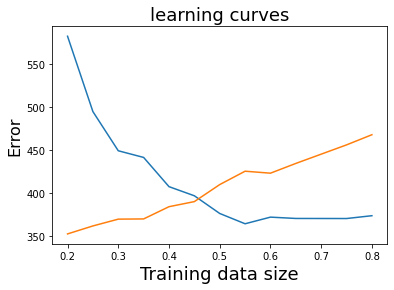

In [17]:
#lerning curves
train= [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.75,0.8]
A=[]
B=[]
MSE_train=[]
MSE_test=[]

for i in range(len(train)):
    num = int(len(X)*train[i])

    #Training data:
    train_X = X[:num]
    train_Y = Y[:num]
    #Testing data:
    test_X = X[num:]
    test_Y = Y[num:]
    r,c = np.shape(train_X)
    a=np.zeros([c,1])
    r,c = np.shape(test_X)
    b=np.zeros([c,1])
    A.append(gradient_descent(a,train_X,train_Y,0.075))
    B.append(gradient_descent(b,test_X,test_Y,0.075))
plt.plot(train,A)
plt.plot(train,B)
plt.xlabel('Training data size', fontsize=18)
plt.ylabel('Error', fontsize=16)
plt.title('learning curves', fontsize=18)
plt.show()